In [1]:
import matplotlib as mpl
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import matplotlib.animation as animation

t = 0.0
sigma0 = 0.5
deltax = 0.04
k0 = 17*np.pi 
deltat = 0.5*deltax*deltax
xmax = 6.0
alpha = 0.5*deltat/(deltat*deltat)

xs = np.arange( -xmax, xmax + deltax/2.0, deltax)

psi = np.zeros((301,2))

psr = np.zeros((301,2))

rho = np.zeros(301)

psi[:,1]=(np.exp(-0.5*np.power((xs-5)/sigma0,2))*np.sin(k0*xs))
psr[:,1]=(np.exp(-0.5*np.power((xs-5)/sigma0,2))*np.cos(k0*xs))

v=15.0*np.power(xs,2)

t = t + 0.5*deltat

for paso in range(500):
    t = t + 0.5*deltat
    #print(paso)
    
    psi[:,0] = psi[:,1]
    psr[:,0] = psr[:,1]
    if paso%2 == 0:
        psr[0,1] = psr[0,0] - 2*(alpha*(psi[1,0]) - 2*(alpha + v[0]*deltat)*psi[0,0])
        psr[1:-1,1] = psr[1:-1,0] - 2*(alpha*(psi[2:,0]+psi[0:-2,0]) - 2*(alpha + v[1:-1]*deltat)*psi[1:-1,0])
        psr[-1:,1] = psr[-1:,0] - 2*(alpha*(psi[-2:-1,0]) - 2*(alpha + v[-1]*deltat)*psi[-1:,0])
    else:                         
        psi[0,1] = psi[0,0] + 2*(alpha*(psr[1,0]) - 2*(alpha + v[0]*deltat)*psr[0,0])
        psi[1:-1,1] = psi[1:-1,0] + 2*(alpha*(psr[2:,0]+psr[0:-2,0]) - 2*(alpha + v[1:-1]*deltat)*psr[1:-1,0])
        psi[-1:,1] = psi[-1:,0] + 2*(alpha*(psr[-2:-1,0]) - 2*(alpha + v[-1]*deltat)*psr[-1:,0])



#rho = np.sqrt(np.power(psi[:,0],2) + np.power(psr[:,0],2))

def rho(psi,psr):
    if isinstance(t,int):
        rho 

print(rho)

<function rho at 0x7fe0c2ac1300>


/tmp/ipykernel_4793/2353457878.py:38: RuntimeWarning: overflow encountered in multiply
  psr[1:-1,1] = psr[1:-1,0] - 2*(alpha*(psi[2:,0]+psi[0:-2,0]) - 2*(alpha + v[1:-1]*deltat)*psi[1:-1,0])
/tmp/ipykernel_4793/2353457878.py:38: RuntimeWarning: overflow encountered in subtract
  psr[1:-1,1] = psr[1:-1,0] - 2*(alpha*(psi[2:,0]+psi[0:-2,0]) - 2*(alpha + v[1:-1]*deltat)*psi[1:-1,0])
/tmp/ipykernel_4793/2353457878.py:39: RuntimeWarning: overflow encountered in multiply
  psr[-1:,1] = psr[-1:,0] - 2*(alpha*(psi[-2:-1,0]) - 2*(alpha + v[-1]*deltat)*psi[-1:,0])
/tmp/ipykernel_4793/2353457878.py:42: RuntimeWarning: overflow encountered in multiply
  psi[1:-1,1] = psi[1:-1,0] + 2*(alpha*(psr[2:,0]+psr[0:-2,0]) - 2*(alpha + v[1:-1]*deltat)*psr[1:-1,0])
/tmp/ipykernel_4793/2353457878.py:42: RuntimeWarning: overflow encountered in subtract
  psi[1:-1,1] = psi[1:-1,0] + 2*(alpha*(psr[2:,0]+psr[0:-2,0]) - 2*(alpha + v[1:-1]*deltat)*psr[1:-1,0])
/tmp/ipykernel_4793/2353457878.py:42: RuntimeWarning: 

##Animacion.

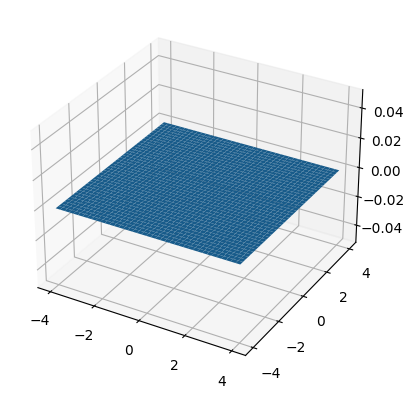

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

fps=20
frn= fps*6
N = 200

x = np.linspace(-4,4,N+1)
X,Y = np.meshgrid(x,x)
z = np.zeros((N+1,N+1,frn))

def animate(i,z,plot):
    plot[0].remove()
    rho = 1.5 + np.sin(i*2*np.pi)
    z[:,:,i] = f(rho,xs,t)
    plot[0]=ax.plot_surface(X,Y,z[:,:,i],cmap='magma')

plot = [ax.plot_surface(X,Y,z[:,:,0])]
ani = animation.FuncAnimation(fig, animate, frames=frn, fargs=(z,plot), interval=1000/fps)
plt.show()
#anim.save('densidad3d.gif',fps=fps)
# -
# ## 3D animation with matplotlib
#
# The following code is a 3D animation of the function $f(x,y,z) = \rho \sin(2\pi i)$.
#
# The animation is created using the `FuncAnimation` class from the `matplotlib.animation` module.
#
# The function `animate` is called at each frame of the animation.
#
# The argument `i` is the frame number.
#
# The argument `z` is a 3D array containing the values of the function at each frame.
#
# The argument `plot` is a list containing the plot object.
#

    